- data4/프로야구.csv 를 이용하여 아래를 작성하시요.

- target: 2018년 연봉 
- 나머지:feature(선수명은 제거)

1) SGDRegress 모델의 r2 점수(train, test )를 출력하시요.

2) 
heatmap을그리고
다중공선성 컬럼을 확인하고
다중공선성이 높은 컬럼을 제거후
SGDRegress  모델의 r2 점수(train, test )를 출력하시요.

3) Lasso 모델을 이용하여 r2 점수(train, test )를 출력하시요.

5, 6, 7 번  은 문제를 만들어서 데이터를 분석하시요 ( 예를 들어 연봉이 가장높은 top 5 선수명 연봉등


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris

from sklearn.linear_model import Ridge,Lasso,ElasticNet, LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=12.8,10.8
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('data4/프로야구.csv')
df

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,2,5,0,0,2,33,5,62.2,...,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
148,정용운,KIA,3,2,0,0,0,25,11,59.1,...,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
149,노경은,롯데,0,2,0,0,0,9,2,14.2,...,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000
150,김승현,삼성,0,3,0,1,0,41,0,43.2,...,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900


In [3]:
df.iloc[0]

선수명             켈리
팀명              SK
승               16
패                7
세                0
홀드               0
블론               0
경기              30
선발              30
이닝             190
삼진/9          8.95
볼넷/9          2.13
홈런/9          0.76
BABIP        0.342
LOB%          73.7
ERA            3.6
RA9-WAR       6.91
FIP           3.69
kFIP          3.44
WAR           6.62
연봉(2018)    140000
연봉(2017)     85000
Name: 0, dtype: object

In [4]:
x_data = df.drop(['선수명', '연봉(2018)'], axis=1)
y_data = df['연봉(2018)']
x_data

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,SK,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,85000
1,LG,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,50000
2,KIA,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000
3,LG,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000
4,롯데,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,한화,2,5,0,0,2,33,5,62.2,4.31,3.30,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,8100
148,KIA,3,2,0,0,0,25,11,59.1,4.85,5.61,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,3100
149,롯데,0,2,0,0,0,9,2,14.2,4.91,4.91,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,16000
150,삼성,0,3,0,1,0,41,0,43.2,7.63,7.01,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,2900


In [5]:
y_data

0      140000
1      120000
2      230000
3      100000
4      111000
        ...  
147      7100
148      7500
149     10000
150      4000
151      4000
Name: 연봉(2018), Length: 152, dtype: int64

In [6]:
lbl = LabelEncoder()
x_data['팀명'] = lbl.fit_transform(x_data['팀명'])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                test_size=0.2,random_state=1)


In [8]:
model = make_pipeline(StandardScaler(), SGDRegressor())
model.fit(x_train, y_train)
model.score(x_train, y_train)

model.score(x_test, y_test)

r2scores = cross_val_score(model, x_data, y_data, cv=5, scoring='r2', verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [9]:
model.score(x_train, y_train)

0.9315368632913467

In [10]:
model.score(x_test, y_test)

0.7399561486879538

In [11]:
import seaborn as sb

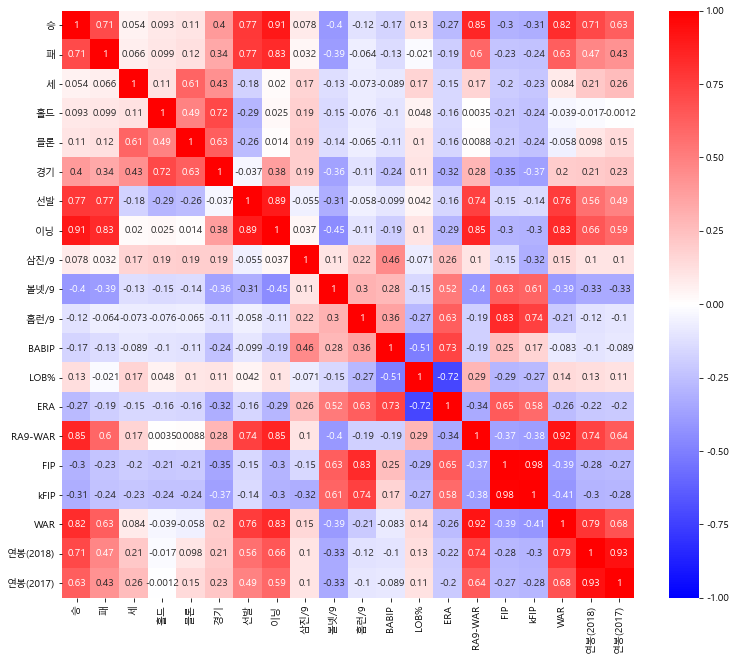

In [12]:
sb.heatmap(df.corr(),annot=True,cmap='bwr',vmin=-1,vmax=1) #빨간색일수록 양의  상관관계 파란색은 음의 상관관계 흰색은 상관관계 없음
plt.show()

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(x_data.iloc[:,1:].values, i )  for i in range( x_data.iloc[:,1:].shape[1] ) ]
vif['features'] = x_data.iloc[:,1:].columns
display(vif)


,VIF Factor,features
0,13.005953,승
1,10.593260,패
2,3.303690,세
3,4.846833,홀드
4,3.578651,블론
5,43.970237,경기
6,50.361572,선발
7,138.016798,이닝
8,560.722736,삼진/9
9,122.773018,볼넷/9


In [14]:
temp=x_data.drop(['FIP','kFIP'],axis=1)

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(temp.iloc[:,1:].values, i )  for i in range( temp.iloc[:,1:].shape[1] ) ]
vif['features'] = temp.iloc[:,1:].columns
display(vif)


,VIF Factor,features
0,12.952050,승
1,10.469778,패
2,3.286497,세
3,4.805479,홀드
4,3.547565,블론
5,42.747619,경기
6,50.141245,선발
7,135.895660,이닝
8,12.101568,삼진/9
9,8.469169,볼넷/9


In [16]:
temp=temp.drop(['이닝'],axis=1)

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(temp.iloc[:,1:].values, i )  for i in range( temp.iloc[:,1:].shape[1] ) ]
vif['features'] = temp.iloc[:,1:].columns
display(vif)

,VIF Factor,features
0,12.722995,승
1,10.272649,패
2,2.995484,세
3,4.455724,홀드
4,3.542872,블론
5,14.120776,경기
6,15.781080,선발
7,12.014940,삼진/9
8,8.434384,볼넷/9
9,5.019506,홈런/9


In [18]:
temp=temp.drop(['BABIP'],axis=1)

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(temp.iloc[:,1:].values, i )  for i in range( temp.iloc[:,1:].shape[1] ) ]
vif['features'] = temp.iloc[:,1:].columns
display(vif)

,VIF Factor,features
0,12.717304,승
1,10.262881,패
2,2.993113,세
3,4.454751,홀드
4,3.542596,블론
5,14.108487,경기
6,15.741437,선발
7,10.215496,삼진/9
8,7.665564,볼넷/9
9,4.447631,홈런/9


In [20]:
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(temp.iloc[:,1:].values, i )  for i in range( temp.iloc[:,1:].shape[1] ) ]
vif['features'] = temp.iloc[:,1:].columns
display(vif)

,VIF Factor,features
0,12.717304,승
1,10.262881,패
2,2.993113,세
3,4.454751,홀드
4,3.542596,블론
5,14.108487,경기
6,15.741437,선발
7,10.215496,삼진/9
8,7.665564,볼넷/9
9,4.447631,홈런/9


In [21]:
temp=temp.drop(['RA9-WAR'],axis=1)

In [22]:
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(temp.iloc[:,1:].values, i )  for i in range( temp.iloc[:,1:].shape[1] ) ]
vif['features'] = temp.iloc[:,1:].columns
display(vif)

,VIF Factor,features
0,11.412290,승
1,9.233335,패
2,2.580731,세
3,4.302224,홀드
4,3.515614,블론
5,14.106998,경기
6,14.461836,선발
7,10.148229,삼진/9
8,7.665375,볼넷/9
9,4.401169,홈런/9


In [23]:
temp=temp.drop(['선발'],axis=1)
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(temp.iloc[:,1:].values, i )  for i in range( temp.iloc[:,1:].shape[1] ) ]
vif['features'] = temp.iloc[:,1:].columns
display(vif)

,VIF Factor,features
0,8.947791,승
1,4.315996,패
2,2.471805,세
3,3.747774,홀드
4,3.341834,블론
5,13.547366,경기
6,10.105916,삼진/9
7,7.663222,볼넷/9
8,4.376663,홈런/9
9,12.007928,LOB%


In [24]:
temp=temp.drop(['LOB%'],axis=1)
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(temp.iloc[:,1:].values, i )  for i in range( temp.iloc[:,1:].shape[1] ) ]
vif['features'] = temp.iloc[:,1:].columns
display(vif)

,VIF Factor,features
0,8.939468,승
1,4.231586,패
2,2.445381,세
3,3.549453,홀드
4,3.311101,블론
5,11.453192,경기
6,8.252516,삼진/9
7,5.117844,볼넷/9
8,4.321524,홈런/9
9,7.092188,ERA


In [25]:
x_train, x_test, y_train, y_test = train_test_split(temp, y_data, 
                                test_size=0.2,random_state=1)




In [26]:
model = make_pipeline(StandardScaler(), SGDRegressor())
model.fit(x_train, y_train)
model.score(x_train, y_train)

model.score(x_test, y_test)

r2scores = cross_val_score(model, x_data, y_data, cv=5, scoring='r2', verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [27]:
model.score(x_train, y_train)


0.9276892761033664

In [28]:
model.score(x_test, y_test)

0.7603302136295282

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                test_size=0.2,random_state=1)


3) Lasso 모델을 이용하여 r2 점수(train, test )를 출력하시요.

In [30]:
model = make_pipeline(StandardScaler(), Lasso())
# model.fit(x_train, y_train)
param_value = {'lasso__alpha' : [0.001, 0.01, 1, 2, 3]}
gridS = GridSearchCV(model, param_grid = param_value, scoring = 'r2')
gridS.fit(x_train, y_train)

print('Lasso train r2score : ', gridS.score(x_train, y_train))
print('Lasso test r2score : ', gridS.score(x_test, y_test))

Lasso train r2score :  0.9342621391886119
Lasso test r2score :  0.6668462598799129


## 4. 2017년과 2018년을 비교했을 때 연봉 인상이 큰 5명의 선수 추출

In [31]:
df['연봉차이'] = df['연봉(2018)'] - df['연봉(2017)']
df.sort_values('연봉차이', ascending= False).head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017),연봉차이
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000,80000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000,70000
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000,55000
5,피어밴드,KT,8,10,0,0,0,26,26,160.0,...,0.289,76.1,3.04,6.52,4.42,4.32,3.94,85000,35000,50000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000,26000


## 5. 인상연봉과 상관관계가 높은 feature와 scatter plot 그리기 

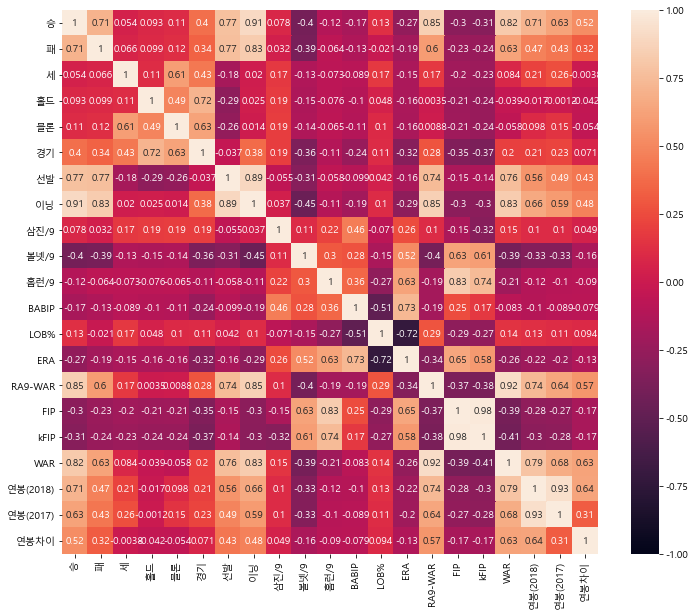

In [32]:
df_corr = df.drop(['선수명', '팀명'], axis = 1)
plt.figure(figsize=(12,10))
sns.heatmap(df_corr.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

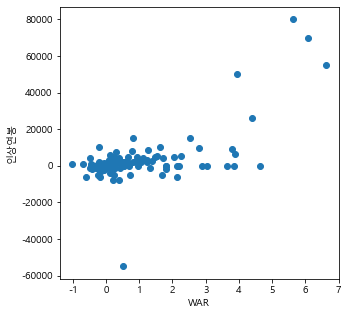

In [33]:
#연봉 차이와 가장 상관관계가 높은 feature 찾기
df.corr()['연봉차이'].sort_values(ascending = False)

# 연봉 차이와 war와의 그래프
plt.figure(figsize = (5,5))
plt.scatter(df['WAR'], df['연봉차이'])
plt.ylabel('인상연봉')
plt.xlabel('WAR')
plt.show()

## 6. 선수 가성비(연봉/WAR) best&worst 5

In [34]:

# WAR이 0 이하인 선수 제거
df.drop(df.loc[df['WAR']<=0].index, inplace=True)


# 가성비 컬럼생성
df['가성비'] = 0 
df['가성비'] = df['연봉(2018)'] / df['WAR']

# 가성비가 가장 좋은 선수 5명 정렬
df.sort_values('가성비').head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017),연봉차이,가성비
6,고영표,KT,8,12,0,1,0,25,24,141.2,...,64.6,5.08,2.97,3.88,3.78,3.87,11500,5200,6300,2971.576227
8,함덕주,두산,9,8,0,2,0,35,24,137.1,...,73.1,3.67,4.99,3.91,3.67,3.78,16000,7000,9000,4232.804233
12,임기영,KIA,8,6,0,0,0,23,19,118.1,...,72.3,3.65,4.25,4.07,4.19,2.79,13000,3100,9900,4659.498208
34,김재영,한화,5,7,0,0,1,20,15,85.1,...,67.8,4.54,1.60,5.00,5.23,1.06,5300,3000,2300,5000.000000
31,김원중,롯데,7,8,0,0,0,24,24,107.1,...,70.3,5.70,2.22,5.53,5.56,1.23,6300,3000,3300,5121.951220


In [35]:
# 가성비가 좋지 않은 선수 5명 정렬
df.sort_values('가성비').tail()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017),연봉차이,가성비
92,임현준,삼성,0,0,0,0,0,10,0,10.2,...,58.8,5.06,-0.04,4.67,5.22,0.03,3500,3200,300,116666.666667
93,장민익,두산,0,0,0,0,0,3,0,2.0,...,100.0,0.00,0.08,4.73,4.61,0.02,2700,2700,0,135000.000000
67,채병용,SK,6,4,0,6,3,43,0,50.0,...,58.1,6.84,-0.17,5.05,4.94,0.22,30000,25000,5000,136363.636364
94,박경태,KIA,0,0,0,0,0,3,0,4.0,...,40.0,9.00,-0.17,4.48,4.56,0.02,4000,4900,-900,200000.000000
90,임준혁,SK,0,0,1,2,0,43,0,45.1,...,74.0,4.57,0.62,5.34,5.54,0.04,9500,10000,-500,237500.000000
